In [1]:
!pip install d2l
%matplotlib inline
import torch
from d2l import torch as d2l

img = d2l.plt.imread('./catdog.jpg')
h, w = img.shape[:2]
h, w

     |████████████████████████████████| 92kB 6.2MB/s 


(284, 361)

In [2]:
def display_anchors(fmap_w, fmap_h, s):
    d2l.set_figsize()
    # 前两个维度上的值不影响输出
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
    bbox_scale = torch.tensor((w, h, w, h))
    d2l.show_bboxes(d2l.plt.imshow(img).axes, anchors[0] * bbox_scale)

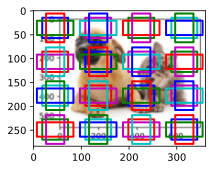

In [3]:
#首先，让我们考虑探测小目标。 为了在显示时更容易分辨，在这里具有不同中心的锚框不会重叠： 
#锚框的尺度设置为 0.15，特征图的高度和宽度设置为 4。 我们可以看到，图像上 4 行和 4 列的锚框的中心是均匀分布的。
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

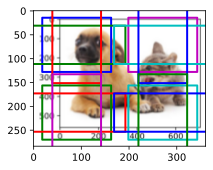

In [4]:
#然后，我们将特征图的高度和宽度减小一半，然后使用较大的锚框来检测较大的目标。 当尺度设置为 0.4 时，一些锚框将彼此重叠。
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

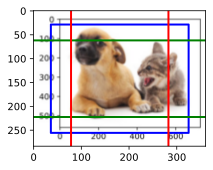

In [5]:
#最后，我们进一步将特征图的高度和宽度减小一半，然后将锚框的尺度增加到0.8。 此时，锚框的中心即是图像的中心。
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])